In [1]:
import graphviz 
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')

In [3]:
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917


# Floresta para Regressão
## Completa

In [4]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00109816 -0.00082413 -0.00109205 -0.00130347 -0.00125515 -0.00121244
 -0.00121568 -0.0009739  -0.00115378 -0.0011336 ] 

O erro quadrático médio foi: 0.001013
O erro quadrático total foi: 1.909984
O maior erro por previsão foi: 0.299432
O erro relativo foi 7.097815%

Error for the time series sample:
O erro quadrático médio foi: 0.004779
O erro quadrático total foi: 1.796025
O maior erro por previsão foi: 0.481449
O erro relativo foi 13.934863%


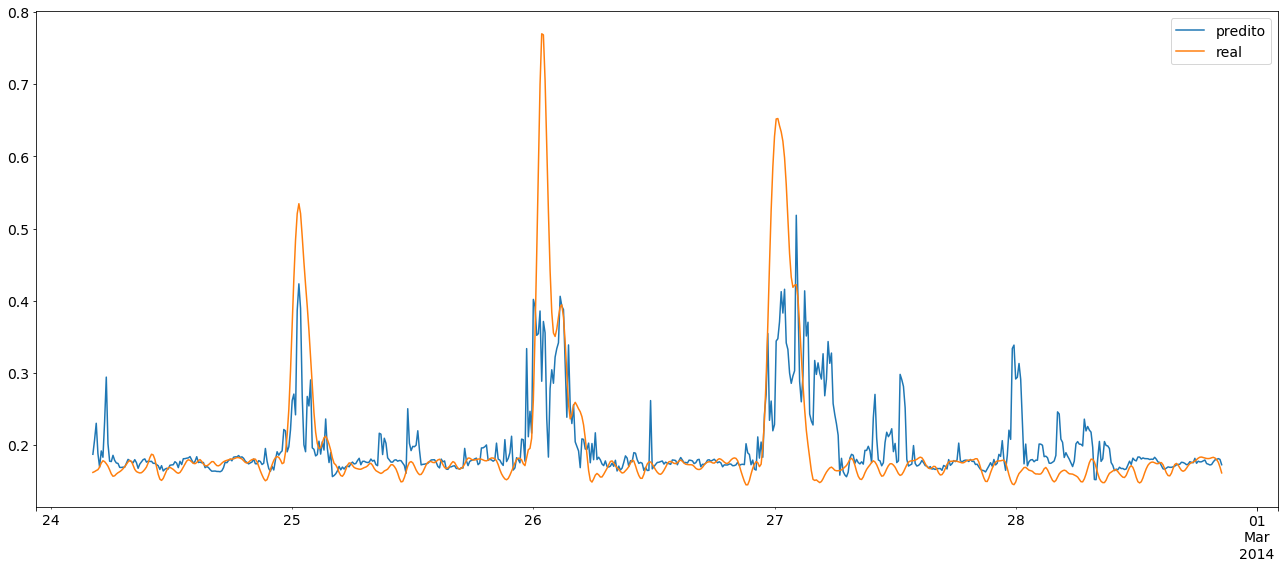

In [5]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predito'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predito'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(18, 8));
plt.tight_layout()
plt.savefig('./images/regression_random_florest.eps', format='eps', dpi=1000)

## Sem vtec

In [6]:
instances_set = ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00135449 -0.00120992 -0.00152284 -0.00150809 -0.00174224 -0.00163176
 -0.00143046 -0.00110747 -0.00148609 -0.0015638 ] 

O erro quadrático médio foi: 0.001338
O erro quadrático total foi: 2.194579
O maior erro por previsão foi: 0.298283
O erro relativo foi 8.700120%

Error for the time series sample:
O erro quadrático médio foi: 0.006046
O erro quadrático total foi: 2.020242
O maior erro por previsão foi: 0.558178
O erro relativo foi 18.249898%


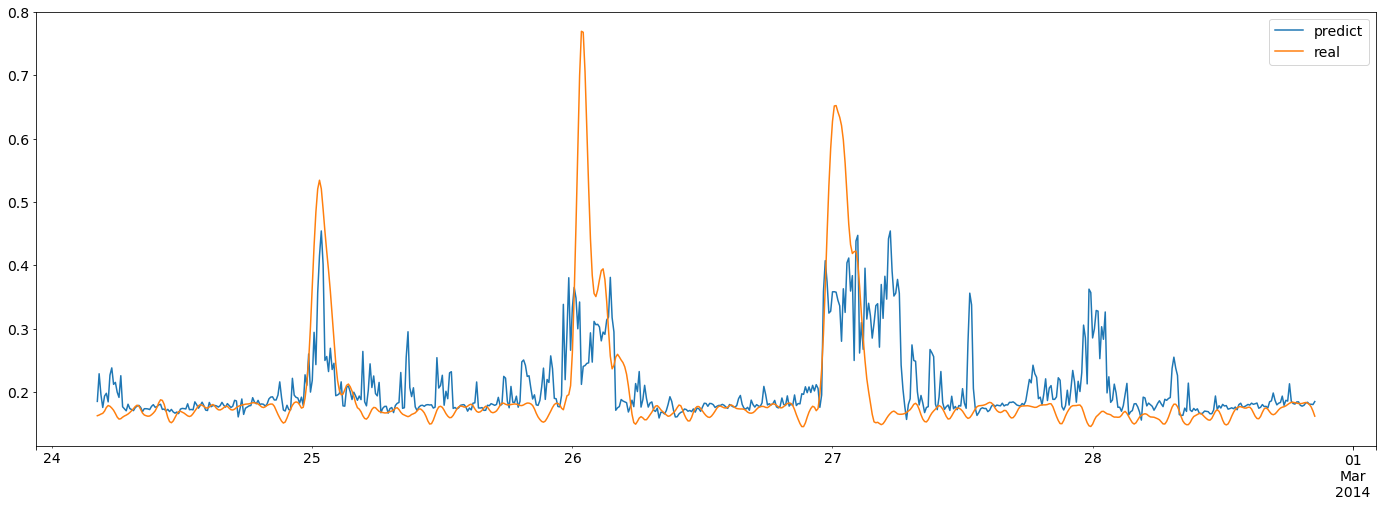

In [7]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal primeira do VTEC

In [8]:
instances_set = ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00117496 -0.00088131 -0.00123881 -0.00126751 -0.00118918 -0.00123987
 -0.00144815 -0.00094642 -0.00111923 -0.00125102] 

O erro quadrático médio foi: 0.001120
O erro quadrático total foi: 2.008148
O maior erro por previsão foi: 0.303584
O erro relativo foi 7.597025%

Error for the time series sample:
O erro quadrático médio foi: 0.005348
O erro quadrático total foi: 1.899908
O maior erro por previsão foi: 0.459798
O erro relativo foi 15.381427%


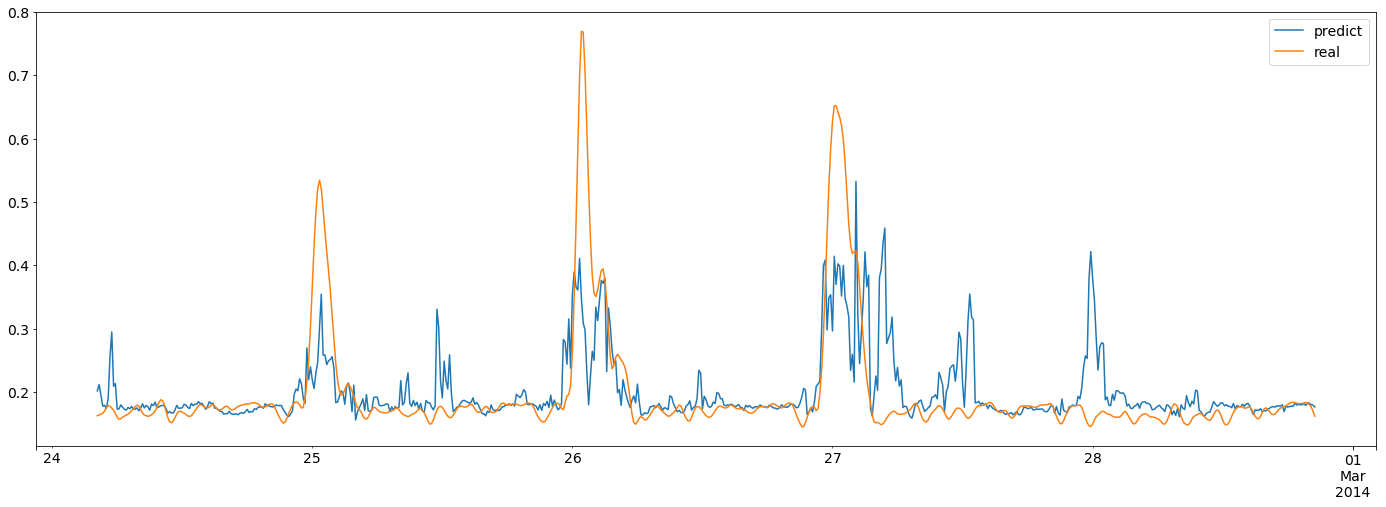

In [9]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal segunda do VTEC

In [10]:
instances_set = ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00117437 -0.00087826 -0.00111722 -0.00130631 -0.00126277 -0.00123771
 -0.00116022 -0.00081688 -0.00112544 -0.00116322] 

O erro quadrático médio foi: 0.001129
O erro quadrático total foi: 2.016049
O maior erro por previsão foi: 0.322987
O erro relativo foi 7.311254%

Error for the time series sample:
O erro quadrático médio foi: 0.004613
O erro quadrático total foi: 1.764655
O maior erro por previsão foi: 0.416596
O erro relativo foi 14.716850%


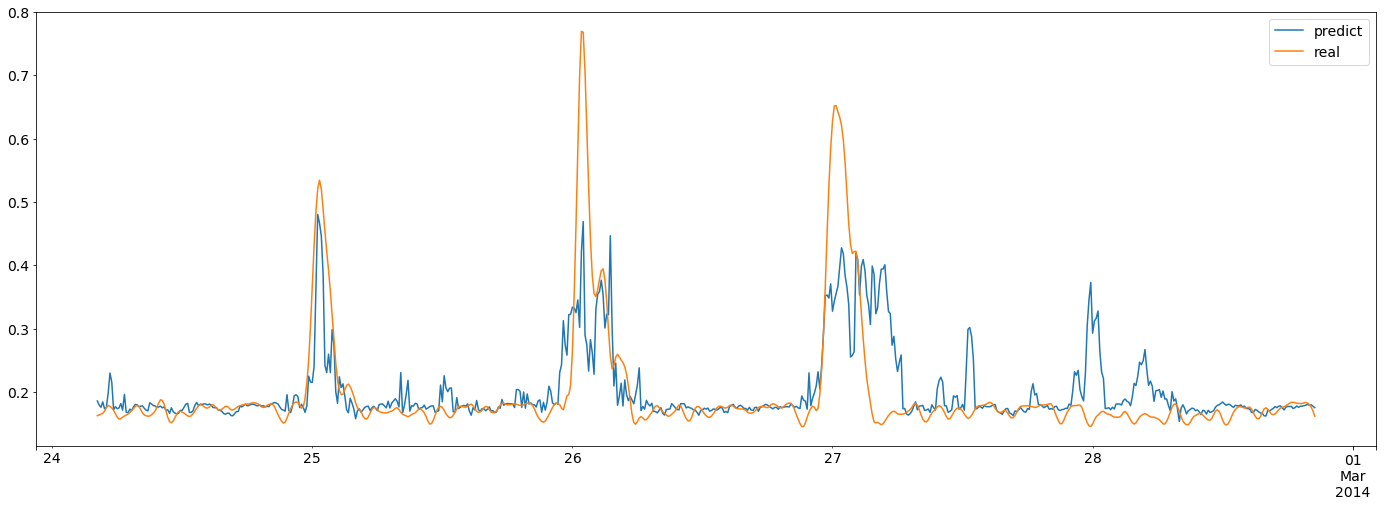

In [11]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem gradiente do VTEC em relação à Pirassununga

In [12]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00125433 -0.00091033 -0.00131131 -0.00130776 -0.0012464  -0.0013522
 -0.00125852 -0.00105807 -0.00123586 -0.00124685] 

O erro quadrático médio foi: 0.001155
O erro quadrático total foi: 2.038966
O maior erro por previsão foi: 0.302076
O erro relativo foi 7.685521%

Error for the time series sample:
O erro quadrático médio foi: 0.005371
O erro quadrático total foi: 1.903971
O maior erro por previsão foi: 0.440360
O erro relativo foi 15.956135%


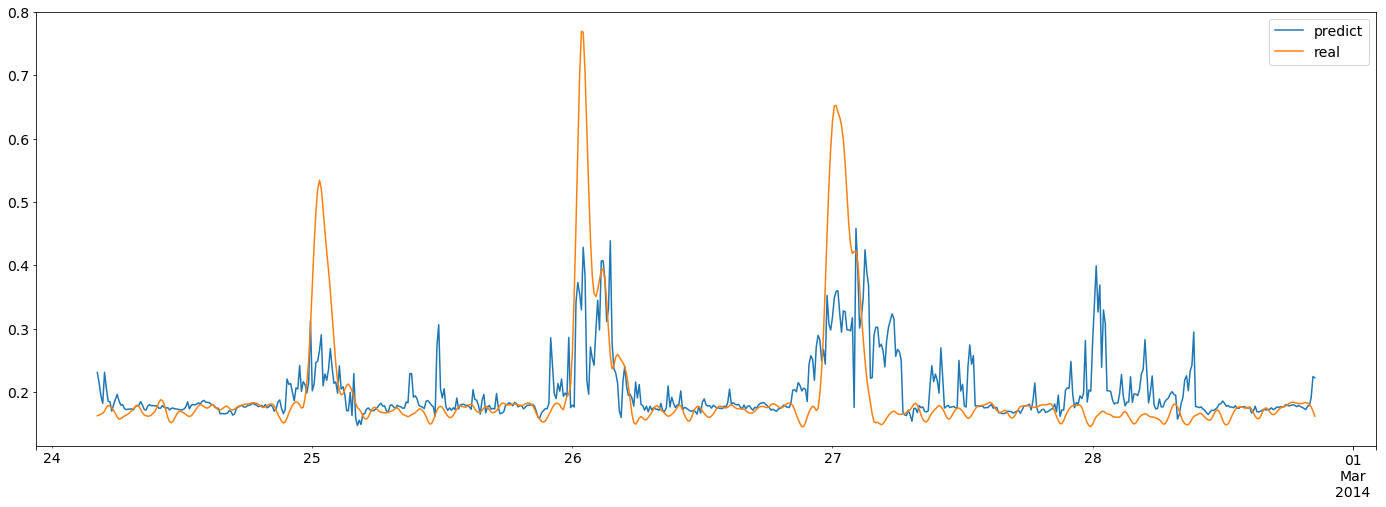

In [13]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal do gradiente do VTEC em relação à Pirassununga

In [14]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00118484 -0.00096307 -0.00124366 -0.00122543 -0.00136762 -0.00136331
 -0.00149443 -0.00085382 -0.00123464 -0.00106817] 

O erro quadrático médio foi: 0.001069
O erro quadrático total foi: 1.961664
O maior erro por previsão foi: 0.387056
O erro relativo foi 7.242948%

Error for the time series sample:
O erro quadrático médio foi: 0.005830
O erro quadrático total foi: 1.983712
O maior erro por previsão foi: 0.563458
O erro relativo foi 14.584257%


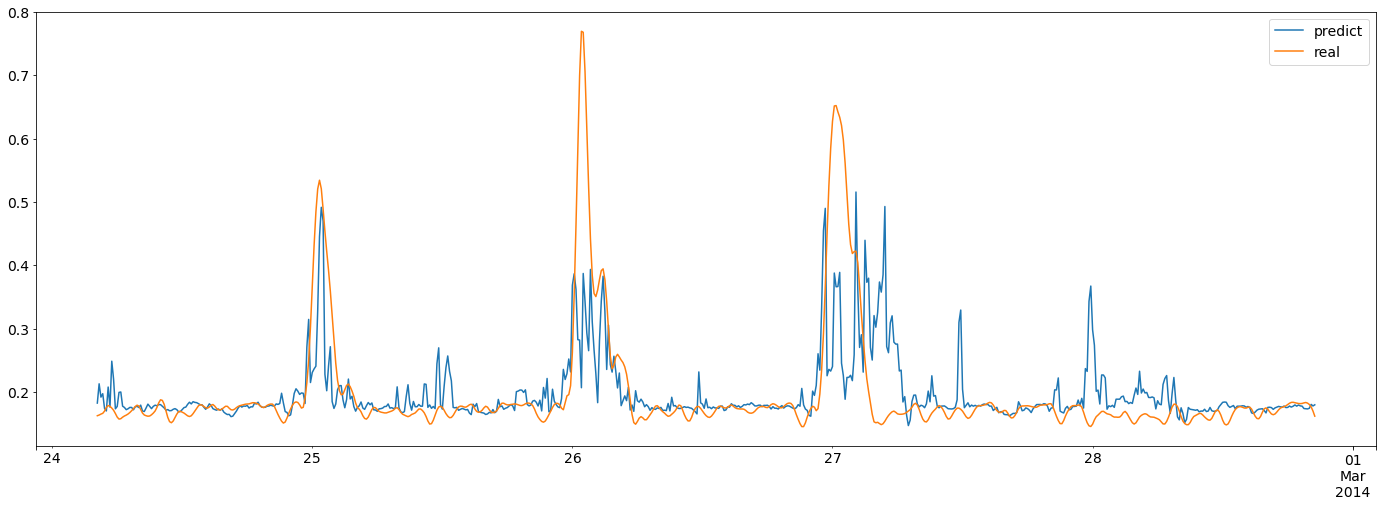

In [15]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem gradiente do VTEC em relação à Brasília

In [16]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00133979 -0.00109021 -0.00136111 -0.00144374 -0.00141072 -0.001733
 -0.0014512  -0.00109066 -0.00118751 -0.00131207] 

O erro quadrático médio foi: 0.001190
O erro quadrático total foi: 2.069849
O maior erro por previsão foi: 0.309687
O erro relativo foi 8.003085%

Error for the time series sample:
O erro quadrático médio foi: 0.005106
O erro quadrático total foi: 1.856408
O maior erro por previsão foi: 0.436449
O erro relativo foi 15.501117%


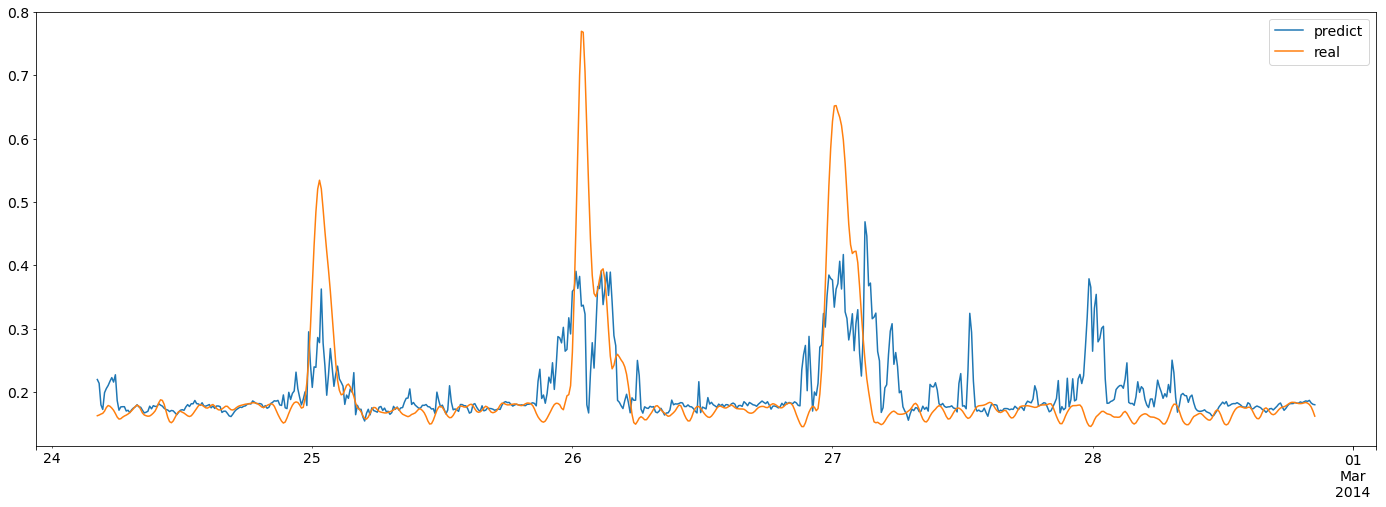

In [17]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal do gradiente do VTEC em relação à Brasília

In [18]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00132888 -0.00089472 -0.00124148 -0.00117811 -0.0011851  -0.00140587
 -0.0012359  -0.00094898 -0.00121536 -0.00115741] 

O erro quadrático médio foi: 0.001033
O erro quadrático total foi: 1.928343
O maior erro por previsão foi: 0.343262
O erro relativo foi 7.310232%

Error for the time series sample:
O erro quadrático médio foi: 0.005795
O erro quadrático total foi: 1.977740
O maior erro por previsão foi: 0.511759
O erro relativo foi 14.811763%


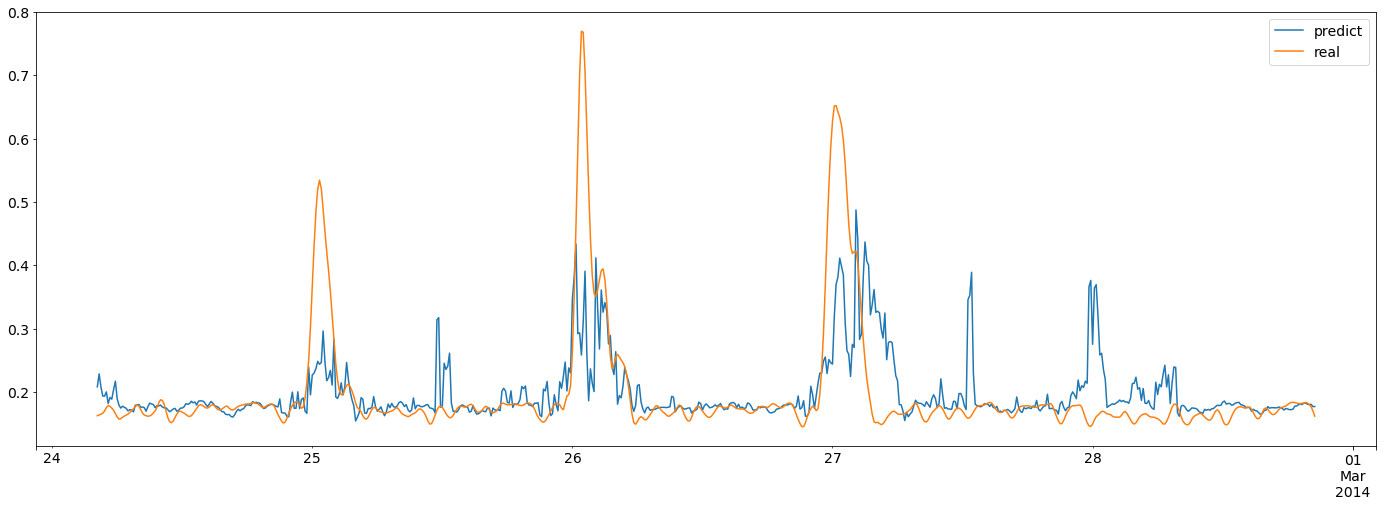

In [19]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));